# Lecture 3

## მონაცემების შესწავლა & გაწმენდა

### ჩავტვირთოთ ვიკიპედიის მონაცემები
(მონაცემების ჩასატვირთად შეგვიძლია გამოვიყენოთ კოდი წინა ლექციიდან)

In [ ]:
from datasets import load_dataset

# ჩამოვტვირთოთ მონაცემები
dataset = load_dataset("wikimedia/wikipedia", "20231101.ka", split='train').shuffle().select(range(5000))

# მონაცემთა ვიზუალიზაცია/გამოკვლევისთვის Pandas უფრო მოქნილი/მრავალფუქციურია, ამიტომ მონაცემების გამოსაკვლევად მისი გამოყენება შედარებით მართებულია
df = dataset.to_pandas()
df.head()

,id,url,title,text
0,218479,https://ka.wikipedia.org/wiki/NGC%207610,NGC 7610,NGC 7610 — გალაქტიკა პეგასის თანავარსკვლავედში...
1,513901,https://ka.wikipedia.org/wiki/%E1%83%9C%E1%83%...,ნატბეური,ნატბეური — არქეოლოგიური ძეგლი მცხეთის მუნიციპა...
2,173885,https://ka.wikipedia.org/wiki/%E1%83%9E%E1%83%...,პორლამარი,პორლამარი () — ქალაქი ვენესუელაში. მდებარეობს ...
3,234173,https://ka.wikipedia.org/wiki/%E1%83%99%E1%83%...,კატურამა,"კატურამა () — მუნიციპალიტეტი ბრაზილიაში, ბაიას..."
4,459906,https://ka.wikipedia.org/wiki/%E1%83%9B%E1%83%...,მარია დი ლურდიშ პინტასილგუ,მარია დი ლურდიშ რუივუ და სილვა დე მატუშ პინტას...


### მონაცემთა სტრუქტურის შესწავლა

In [ ]:
# შევამოწმოთ ცვლადების მონაცემთა ტიპი & ნულოვანი დაკვირვებები & რაოდენობა
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5000 non-null   object
 1   url     5000 non-null   object
 2   title   5000 non-null   object
 3   text    5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


In [ ]:
# დავბეჭდოთ ერთი მაგალით საჩვენებლად
sample = df.sample(1)
# ვაჩვენოთ როგორც dictionary (keys-ს იქნება ცვლადების სახელები)
sample.to_dict(orient='records')

[{'id': '77424',
  'url': 'https://ka.wikipedia.org/wiki/%E1%83%9C%E1%83%94%E1%83%9B%E1%83%A1%E1%83%98%E1%83%A7%E1%83%9A%E1%83%90%E1%83%9E%E1%83%98%E1%83%94%E1%83%91%E1%83%98',
  'title': 'ნემსიყლაპიები',
  'text': 'ნემსიყლაპიები () — მტაცებელი მწერების რიგი. მათი სხეულის სიგრძე 13 სმ-ს აღწევს. აქვთ მოძრავი თავი, დიდი თვალები, უხვად დაძარღვული, გამჭვირვალე 4 ფრთა, კოპულირებენ ფრენის დროს. კვერცხებს დებენ წყალში ან წყლის მცენარეების ქსოვილებში. მატლები ვითარდებიან წყალში, სუნთქავენ ლაყუჩებით. ახასიათებთ არასრული გარდაქმნა. ნემსიყლაპიების მატლს აქვს ძლიერ წაგრძელებული ქვედა ტუჩი, რომელიც მსხვერპლის დასაჭერ ორგანოს — ნიღაბს ქმნის. პირის აპარატი მღრღნელია. იკვებებიან წყლის მწერების მატლებით. რიგში 4500 სახეობაა. ჩვენში, უმთავრესად აღმოსავლეთ საქართველოში, ნემსიყლაპიები საკმაოდ ფართოდ არიან გავრცელებული. დასავლეთ საქართველოში დაბლობებსა და ზეგნების ზონაში გვხვდება. უფრო მარა სახეობათა რაოდენობა გაცილებით ნაკლებია. ანადგურებენ კოღოებს, მუმლს და სხვა მავნე მწერებს, ავრცელებენ პროტოგონიმოზს — 

### შევამოწმოთ მარტივი სტატისტიკები
მარტივი სტატისტიკის გამოთვლა გვეხმარება მონაცემთა პირველადი გაგებაში. მაგალითად, შეგვიძლია შევხედოთ შემდეგ ცვლადებს:
- მონაცემთა ტიპებს
- გამოტოვებულ/ცარიელ მნიშვნელობებს

In [ ]:
# შევამოწმოთ ნულოვანი/ცარიელი დაკვირვებების რაოდენობა
df.isnull().sum()

id       0
url      0
title    0
text     0
dtype: int64

In [ ]:
# მოვაცილოთ ზედმეტბი " "-ები დაკვირვებებს
df['text'] = df.text.apply(lambda x: x.strip())
# შევამოწმოთ ის დაკვრვებები, რომლებშიც ტექსტი ცარიელია
df.loc[df.text == '']

,id,url,title,text


დასკვნა
* მონაცემებში არ გვაქვს ნულოვანი მნიშვნელობები
* არ გვაქვს ასევე ცატიელი ტექსტები

### მონაცემთა ვიზუალიზაცია
მონაცემთა ვიზუალიზაცია გვეხმარება შაბლონების, ტენდენციების და ანომალიების ამოცნობაში. შევქმნათ რამდენიმე ძირითადი ვიზუალიზაცია.

In [ ]:
# იმ შემთხვევაში თუ სისტემაზე მოცემული ბიბლიოთეკები დაყენებული არაა, მოაცილეთ "#" და გაუშვით კოდი
# !pip install pandas wordcloud matplotlib

In [ ]:
# საწყისი DataFrame
df.head(2)

,id,url,title,text
0,604,https://ka.wikipedia.org/wiki/%E1%83%94%E1%83%...,ედუარდ შევარდნაძე,"ედუარდ ამბროსის ძე შევარდნაძე (დ. 25 იანვარი, ..."
1,608,https://ka.wikipedia.org/wiki/1%20%E1%83%98%E1...,1 იანვარი,1 იანვარი — გრიგორიანული კალენდრის პირველი დღე...


In [ ]:
from typing import List
# განვსაზღვროთ სიმბოლოები რომელსაც მივაკუთვნებთ პუნქტუაციას
punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~—'

def tokenize_text(text: str) -> List[str]:
    # მოვაცილოთ პუნქტუაცია ტექსტს
    text = ''.join([i for i in text if i not in punctuations])
    # დავყოთ სიტყვები დაშორებებზე
    tokens = text.split()
    return tokens

# გადავუყვეთ თითოეულ დაკვირვებას - გავატაროთ tokenize_text ფუნქციაში (input - text; output List[str])
df['tokens'] = df.text.apply(lambda x: tokenize_text(x))

In [ ]:
# DataFrame ცვლადის დამატების შემდეგ
df.head(2)

,id,url,title,text,tokens
0,604,https://ka.wikipedia.org/wiki/%E1%83%94%E1%83%...,ედუარდ შევარდნაძე,"ედუარდ ამბროსის ძე შევარდნაძე (დ. 25 იანვარი, ...","[ედუარდ, ამბროსის, ძე, შევარდნაძე, დ, 25, იანვ..."
1,608,https://ka.wikipedia.org/wiki/1%20%E1%83%98%E1...,1 იანვარი,1 იანვარი — გრიგორიანული კალენდრის პირველი დღე...,"[1, იანვარი, გრიგორიანული, კალენდრის, პირველი,..."


#### ტოკენიზაცია

In [ ]:
sample = df.sample(1).to_dict(orient='records')
print("პირველადი ტექსტი:")
print(f"<text>\n{sample[0]['text']}\n</text>")
print('-' * 150)
print("ტექსტიდან გამოყოფილი ტოკენები:")
print(f"<tokens>\n{sample[0]['tokens']}\n</tokens>")

პირველადი ტექსტი:
<text>
ვეძათხევის ნასოფლარი — არქეოლოგიური ძეგლი მდებარეობს თიანეთის მუნიციპალიტეტის სოფელ ვეძათხევის ჩრდილოეთით. განეკუთვნება შუა საუკუნეებს. დადასტურებულია ტერასულად განლაგებული ნასახლარი ბუდეები. შენობები ნაგები ყოფილა ნატეხი ქვით.

ლიტერატურა

თიანეთის მუნიციპალიტეტის არქეოლოგიური ძეგლები
</text>
------------------------------------------------------------------------------------------------------------------------------------------------------
ტექსტიდან გამოყოფილი ტოკენები:
<tokens>
['ვეძათხევის', 'ნასოფლარი', 'არქეოლოგიური', 'ძეგლი', 'მდებარეობს', 'თიანეთის', 'მუნიციპალიტეტის', 'სოფელ', 'ვეძათხევის', 'ჩრდილოეთით', 'განეკუთვნება', 'შუა', 'საუკუნეებს', 'დადასტურებულია', 'ტერასულად', 'განლაგებული', 'ნასახლარი', 'ბუდეები', 'შენობები', 'ნაგები', 'ყოფილა', 'ნატეხი', 'ქვით', 'ლიტერატურა', 'თიანეთის', 'მუნიციპალიტეტის', 'არქეოლოგიური', 'ძეგლები']
</tokens>


In [ ]:
import json

# გავნსაზღვროთ ფუნქცია რომელის წაიკითხავს JSON ფაილს
def read_json(path: str):
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# ჩავტვირთოთ ფაილი რომელშიც განსაზღვრულია stopwords
path = "stopwords_ka.json"
stopwords_ka = list(read_json(path).keys()) + ['მიერ', 'წელს', 'ყველაზე', 'სხვ']
print(stopwords_ka)

df['tokens'] = df.tokens.apply(lambda x: [i for i in x if i not in stopwords_ka])

['და', 'რომ', 'არ', 'ამ', 'ეს', 'იყო', 'კი', 'უნდა', 'თუ', 'არის', 'რომელიც', 'ის', 'მისი', 'მაგრამ', 'შემდეგ', 'როგორც', 'რაც', 'რა', 'თუმცა', 'მათ', 'სხვა', 'ვერ', 'ან', 'მას', 'ასევე', 'დიდი', 'მხოლოდ', 'ძალიან', 'ერთი', 'აქვს', 'უფრო', 'ყველა', 'მე', 'შორის', 'არა', 'შესახებ', 'ახალი', 'იგი', 'ჩვენ', 'მის', 'უკვე', 'სადაც', 'იქნება', 'ამის', 'მეორე', 'გამო', 'არც', 'მათი', 'მან', 'ჩვენი', 'ჩემი', 'თავის', 'ორი', 'რომლებიც', 'რომელსაც', 'ისინი', 'როცა', 'როგორ', 'როდესაც', 'ისე', 'რადგან', 'ასე', 'ახლა', 'იყოს', 'წინ', 'არიან', 'მაინც', 'სწორედ', 'ასეთი', 'ბოლო', 'ვარ', 'მაშინ', 'მერე', 'ჯერ', 'აქ', 'გახდა', 'რომლის']


#### Word Cloud

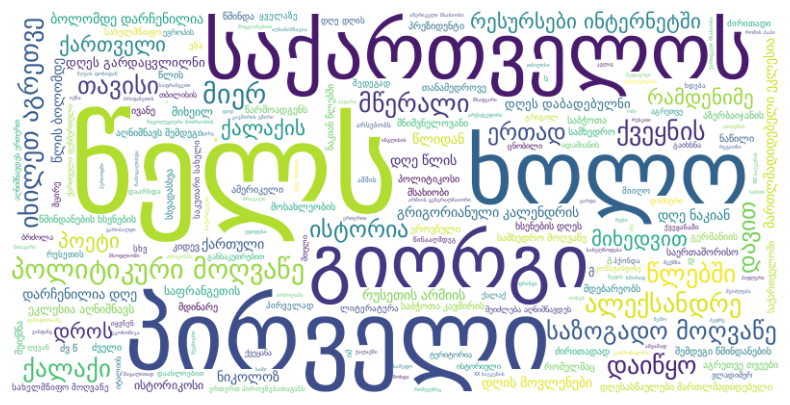

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of tokens into a single string
text = ' '.join([' '.join(tokens) for tokens in df.head(1000)['tokens']])


font_path = 'DejaVuSans.ttf'  # Adjust this path to where you saved the font

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### დავამატოთ მეტი ცვლადები

მონაცემების უფრო სიღრმისელად ანალიზისთვის და შემდეგ უკვე გაფილტვრისთვის, დაგვჭირდება დამატებითი ცვლადების დამატება. მაგალითად:
* **სიტყვების რაოდენობა**
* **სიმბოლოების რაოდენობა**
* **სიტყვები ხაზზე**
* **საშუალო სიტყვების სიგრძე**
* **ქართული სიმბოლოების წილი**
* **პუნქტუაციის წილი**
* **ცარიელი ადგილების წილი**
* **ციფრების წილი**
* **უნიკალური სიტყვების წილი**
* ...

პირველ რიგში განვსაზღვროთ ფუნქციები რომლებიც მიიღებენ ტექსტს და ჩვენთვის სასურველ სტატისტიკას დაგვიბრუნებენ:

In [ ]:
import string

def count_words(text):
    """ითვლის ტექსტში სიტყვების რაოდენობას."""
    words = text.split()
    return len(words)

def count_characters(text):
    """ითვლის ტექსტში სიმბოლოების რაოდენობას."""
    return len(text)

def calculate_words_per_line(text):
    """ითვლის საშუალო სიტყვების რაოდენობას ხაზზე."""
    lines = text.split('\n')
    total_words = sum(len(line.split()) for line in lines)
    return total_words / len(lines) if lines else 0

def calculate_average_word_length(text):
    """ითვლის საშუალო სიტყვების სიგრძეს ტექსტში."""
    words = text.split()
    total_length = sum(len(word) for word in words)
    return total_length / len(words) if words else 0

def calculate_ka_char_share(text):
    """ითვლის ქართული სიმბოლოების წილს ტექსტში."""
    georgian_chars = [char for char in text if '\u10A0' <= char <= '\u10FF']
    return len(georgian_chars) / len(text) if text else 0

def calculate_punctuation_share(text):
    """ითვლის პუნქტუაციის სიმბოლოების წილს ტექსტში."""
    punctuation_chars = [char for char in text if char in string.punctuation]
    return len(punctuation_chars) / len(text) if text else 0

def calculate_whitespace_share(text):
    """ითვლის ცარიელი ადგილების (" ") წილს ტექსტში."""
    whitespace_chars = [char for char in text if char.isspace()]
    return len(whitespace_chars) / len(text) if text else 0

def calculate_digit_share(text):
    """ითვლის ციფრების წილს ტექსტში."""
    digit_chars = [char for char in text if char in "1234567890"]
    return len(digit_chars) / len(text) if text else 0

def calculate_unique_word_share(text):
    """ითვლის უნიკალური სიტყვების რაოდენობას ტექსტშ"""
    words = text.split()
    unique_word_share = len(set(words)) / len(words) if len(words) > 0 else 0
    return unique_word_share

ახლა უკვე შეგვიძლია Dataframe-ში დავამატოთ შესაბამისი ცვლადები:

In [ ]:
df["word_count"] = df["text"].apply(count_words)
df["character_count"] = df["text"].apply(count_characters)
df["words_per_line"] = df["text"].apply(calculate_words_per_line)
df["average_word_length"] = df["text"].apply(calculate_average_word_length)
df["ka_char_share"] = df["text"].apply(calculate_ka_char_share)
df["punctuation_share"] = df["text"].apply(calculate_punctuation_share)
df["whitespace_share"] = df["text"].apply(calculate_whitespace_share)
df["digit_share"] = df["text"].apply(calculate_digit_share)
df["unique_word_share"] = df["text"].apply(calculate_unique_word_share)

უკვე შეგვიძლია ავაგოთ თითოეული ცვლადის განაწილების გრაფიკები და კრიტიკული წეტილები (5%, 10%, 20%):

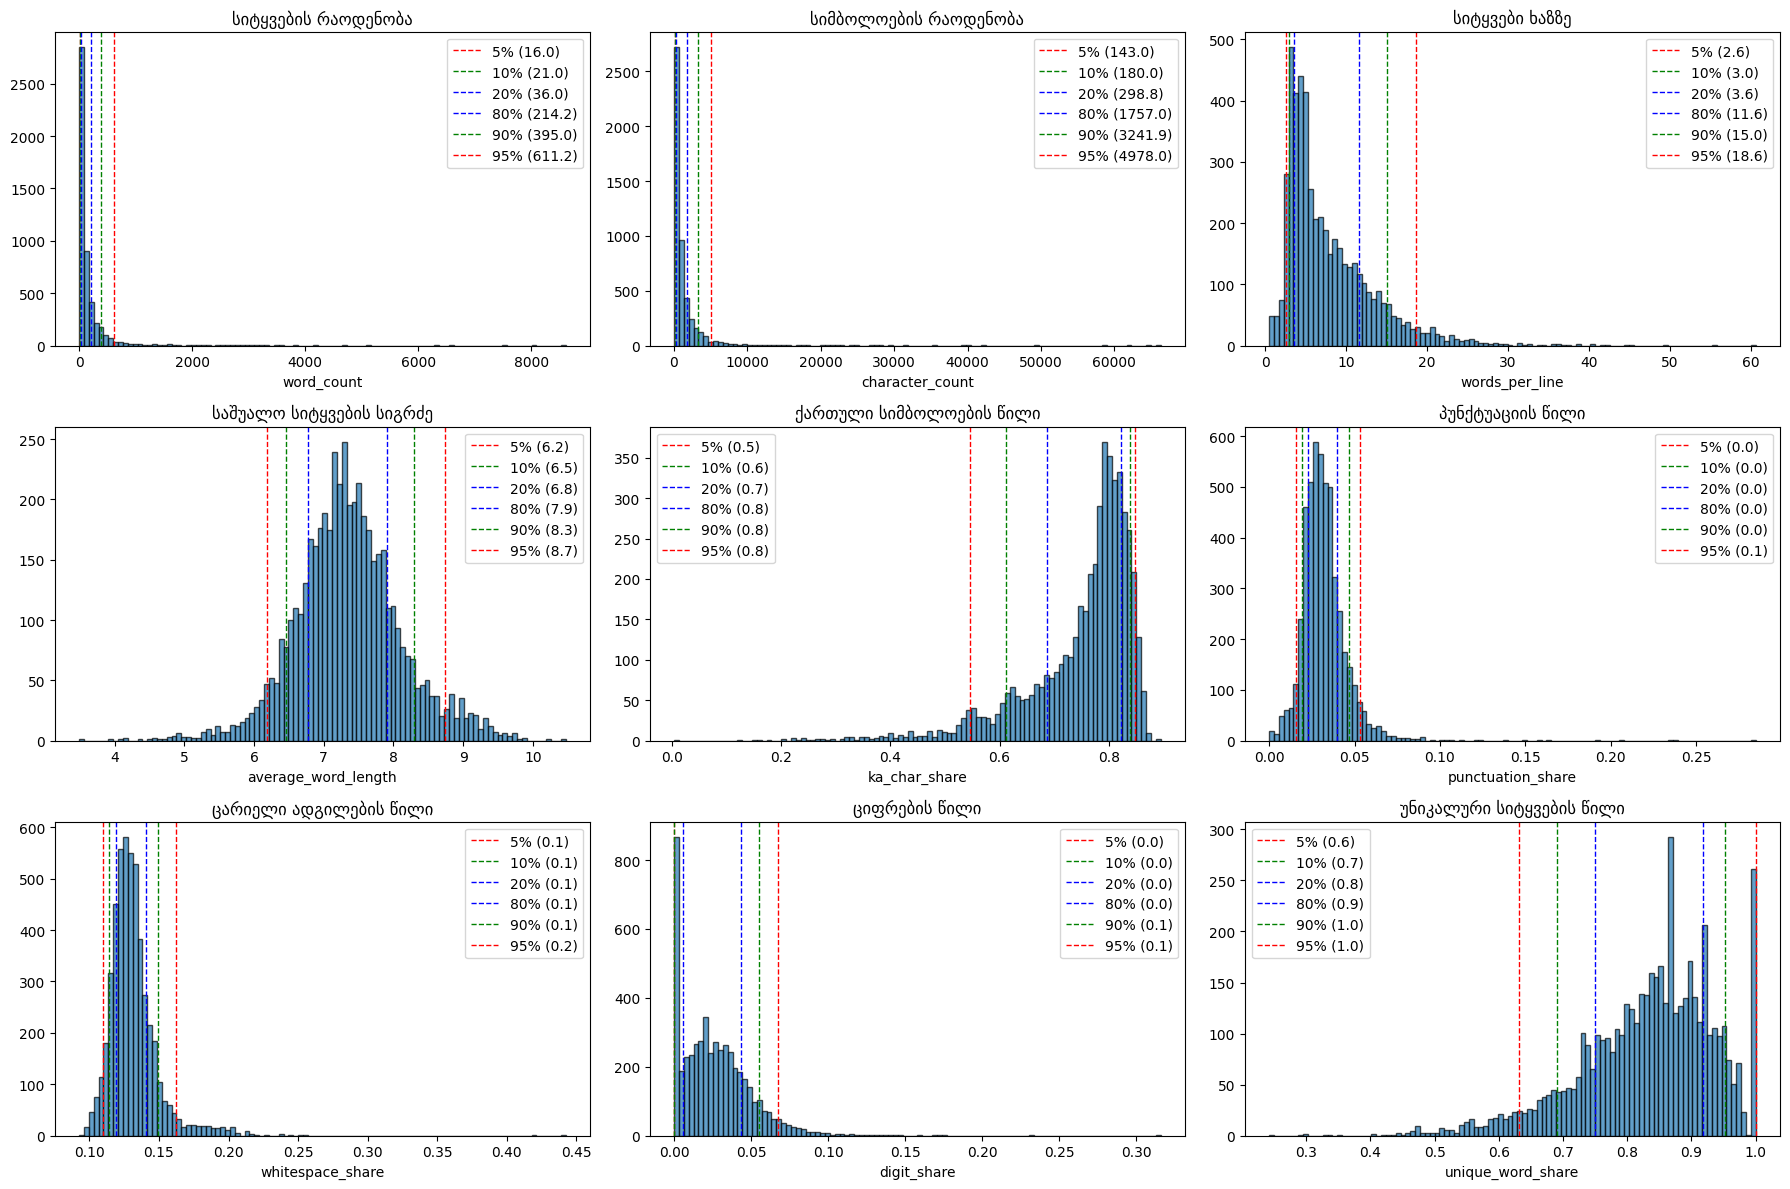

In [ ]:
# !pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# ცვლადების ქართული სახელები
titles_georgian = [
    "სიტყვების რაოდენობა",
    "სიმბოლოების რაოდენობა",
    "სიტყვები ხაზზე",
    "საშუალო სიტყვების სიგრძე",
    "ქართული სიმბოლოების წილი",
    "პუნქტუაციის წილი",
    "ცარიელი ადგილების წილი",
    "ციფრების წილი",
    "უნიკალური სიტყვების წილი"
]

variables = [
    "word_count",
    "character_count",
    "words_per_line",
    "average_word_length",
    "ka_char_share",
    "punctuation_share",
    "whitespace_share",
    "digit_share",
    "unique_word_share"
]

# გამოვსახოთ თითოეული ცვლადის განაწილება ხაზებით 5%, 10%, 20%, 80%, 90%, 95% ნიშნულებზე
plt.figure(figsize=(18, 12))
num_vars = len(variables)

percentiles = [5, 10, 20, 80, 90, 95]
colors = ['r', 'g', 'b', 'b', 'g', 'r']

for i, (var, title) in enumerate(zip(variables, titles_georgian), 1):
    plt.subplot((num_vars + 2) // 3, 3, i)
    plt.hist(df[var], bins=100, edgecolor='black', alpha=0.7)
    lines = []
    labels = []
    for perc, color in zip(percentiles, colors):
        perc_value = df[var].quantile(perc / 100.0)
        line = plt.axvline(perc_value, color=color, linestyle='dashed', linewidth=1)
        lines.append(line)
        labels.append(f'{perc}% ({perc_value:.1f})')
    plt.title(title)
    plt.xlabel(var)
    plt.legend(lines, labels)

plt.tight_layout()
plt.show()

რა დასკვნა შეგვიძლია გამოვიტანოთ გრაფიკებიდან?
* **word_count**: სტატიების უმეტესობა (95) შეიცავს 611-ზე ნაკლებ სიტყვას & გვაქვს რამდენიმე სტატია 2000+ სიტყვით.
* **character_count**: სტატიების უმეტესობა (95) შეიცავს 5000-ზე ნაკლებ სიმბოლოს & რამდენიმე სტატია შეიცავს 10000+ სიმბოლოს.
* **word_per_line**: სტატიების უმეტესობა (5%) შეიცავს 2.6-ზე ნაკლებ სიტყვას ხაზზე.
* **average_word_length**: გვაქვს სტატიები სადაც საშუალო სიტყვის სიგრძე 4-ზე ნაკლებია ან 10-ზე მეტია.
* **ka_char_share**: ქართული სიმბოლოების წილი უმეტეს სტატიებში (95%) 0.8-ზე მეტია, თუმცა ჩანს გამონაკლისებიც.
* **punctuation_share**: პუნქტუაციის წილი უმეტეს სტატიებში (0; 0.1) შუალედშია მოქცეული.
* **whitespace_share**: გამოტოვებების (" ") წილი უმეტესად (0.1; 0.17) ინტერვალშია მოქცეული.
* **digit_share**: ციფრების წილი უმეტეს სტატიებში (95%) 0.1-ზე ნაკლებია.
* **unique_word_share**: უნიკალური სიტყვების წილი უმეტეს სტატიებში 0.5-0.6-ზე მეტია.

### მონაცემების გაფილტვრა

მას შემდეგ რაც წარმოდგენა შეგვექმნა ცვლადებზე, შეგვიძლია მონაცემთა გაფილტვრის რამდენიმე მეთოდი გამოვიყენოთ:
1) თითოეულ ცვლადში თვალით დავადგინოთ მისაღები საზღვრები (მაგალითად მოვაცილოთ სტატიები სადაც სიტყვების რაოდენობა 5-ზე ნაკლებია ან 5000-ზე მეტია);
2) ცვლადებს მოვაცილოთ ქვედა/ზედა X% (გამოდის რომ თითოეული ცვლადის მიხედვით ვაცილებთ 2X%);
3) ვნახოთ მკვლევარები/ორგანიზაციები რა საზღვრებს იყენებენ - გავიმეოროთ მათი ეტაპები.~

ამ შემთხვევაში გამოვიყენებთ ყველაზე მარტივ მეთოდს - 2)

In [ ]:
# განვსაზღვროთ ცვლადები რომლებიც გვინდა გაფილტვრისთვის გამოვიყენოთ
filter_columns = [
    "word_count",
    "character_count",
    "words_per_line",
    "average_word_length",
    "ka_char_share",
    "punctuation_share",
    "whitespace_share",
    "digit_share",
    "unique_word_share"
]

# შევქმნათ dictionary შემდეგი სტრუქტურით {ცვლადის_სახელი: (ქვედა_ზღვარი, ზედა_ზღვარი), ...}
X = 0.025
bounds = {}
for col in filter_columns:
    lower_bound = df[col].quantile(X)
    upper_bound = df[col].quantile(1-X)
    bounds[col] = (lower_bound, upper_bound)

# შევინახოთ გაფილტრული Dataframe ცვლადში filtered_df
filtered_df = df.copy()
for col in filter_columns:
    lower_bound, upper_bound = bounds[col]
    filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]

print(f"სტატიების რაოდენობა საწყის Dataframe-ში: {df.shape[0]}")
print(f"სტატიების რაოდენობა გაფილტვრის შემდეგ: {filtered_df.shape[0]}")

სტატიების რაოდენობა საწყის Dataframe-ში: 5000
სტატიების რაოდენობა გაფილტვრის შემდეგ: 3879
